<a href="https://colab.research.google.com/github/vinayykkumar/Visionary-Advanced-Image-Recognition-for-the-Next-Era_Infosys_Internship_Oct2024/blob/Karthick/imgprcss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import matplotlib.pyplot as plt

# Load an image in RGB
image_path = '/content/drive/MyDrive/Colab Notebooks/My dataset/Amitabh Bachchan/01be2dc1ce.jpg'
image = cv2.imread(image_path)


In [3]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/My dataset/Amitabh Bachchan/01be2dc1ce.jpg')
img.shape

(289, 208, 3)

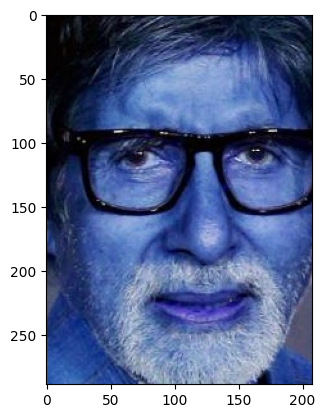

In [4]:
plt.imshow(img)

In [5]:
import cv2
import matplotlib.pyplot as plt

# Load an image in RGB
image_path = '/content/drive/MyDrive/Colab Notebooks/My dataset/Amitabh Bachchan/01be2dc1ce.jpg'
image = cv2.imread(image_path)


In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(289, 208)

array([[ 13,   2,   0, ...,  27,  32,  22],
       [ 10,   1,   1, ...,  22,  18,  20],
       [  6,   1,   1, ...,  24,  23,  22],
       ...,
       [101, 101, 103, ...,  82,  83,  82],
       [105, 104, 103, ...,  86,  86,  87],
       [111, 110, 106, ...,  94,  85,  73]], dtype=uint8)
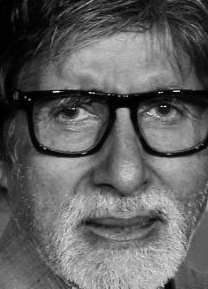

In [7]:
gray

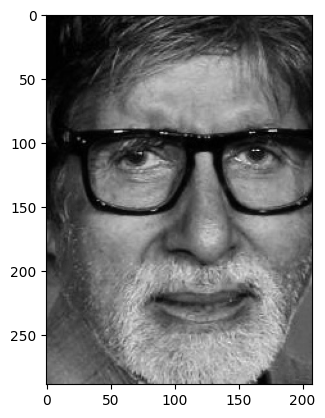

In [8]:
plt.imshow(gray, cmap='gray')

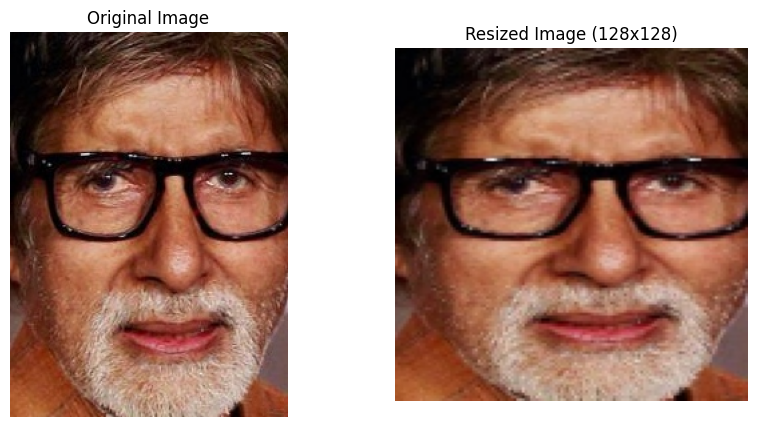

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load the image in its original color format (BGR by default in OpenCV)
image_path = '/content/drive/MyDrive/Colab Notebooks/My dataset/Amitabh Bachchan/01be2dc1ce.jpg'
image = cv2.imread(image_path)

# Convert from BGR to RGB format for correct color display in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image to a new size, e.g., 128x128
resized_image = cv2.resize(image_rgb, (128, 128))

# Display the original and resized images
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Display resized image
plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title('Resized Image (128x128)')
plt.axis('off')

plt.show()


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tqdm import tqdm  # For progress bar


In [ ]:
# Paths to datasets in Google Drive
original_dataset_dir = '/content/drive/MyDrive/Colab Notebooks/My dataset'  # Replace with your dataset path
augmented_dataset_dir = '/content/drive/MyDrive/Colab Notebooks/augmented data'  # Destination for augmented images


In [ ]:
def create_directory_structure(base_dir, class_names):
    """Create the directory structure for the augmented dataset."""
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
    for class_name in class_names:
        class_dir = os.path.join(base_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)

# Get class names from the original dataset
class_names = os.listdir(original_dataset_dir)
create_directory_structure(augmented_dataset_dir, class_names)


In [ ]:
# Data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=30,             # Rotate images randomly
    width_shift_range=0.2,         # Shift images horizontally
    height_shift_range=0.2,        # Shift images vertically
    shear_range=0.2,               # Shear transformations
    zoom_range=0.2,                # Random zoom
    horizontal_flip=True,          # Flip images horizontally
    fill_mode='nearest'            # Fill missing pixels
)


In [ ]:
def augment_images(original_dir, augmented_dir, datagen, num_augmented_per_image=5):
    """
    Generate augmented images and save them in the augmented dataset directory.

    Args:
    - original_dir (str): Path to the original dataset directory.
    - augmented_dir (str): Path to save augmented images.
    - datagen (ImageDataGenerator): Data augmentation generator.
    - num_augmented_per_image (int): Number of augmented images per original image.
    """
    class_names = os.listdir(original_dir)

    for class_name in tqdm(class_names, desc="Augmenting Classes"):
        class_dir = os.path.join(original_dir, class_name)
        save_dir = os.path.join(augmented_dir, class_name)

        if os.path.isdir(class_dir):
            for img_file in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_file)
                try:
                    # Load and preprocess image
                    img = load_img(img_path)  # Load image
                    img_array = img_to_array(img)  # Convert to array
                    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

                    # Generate augmented images
                    i = 0
                    for batch in datagen.flow(
                        img_array,
                        batch_size=1,
                        save_to_dir=save_dir,
                        save_prefix="aug",
                        save_format="jpg"
                    ):
                        i += 1
                        if i >= num_augmented_per_image:  # Stop after creating specified number
                            break
                except Exception as e:
                    print(f"Error processing image {img_path}: {e}")

# Run augmentation
augment_images(original_dataset_dir, augmented_dataset_dir, datagen, num_augmented_per_image=5)

print(f"Augmented dataset created at {augmented_dataset_dir}")


Augmenting Classes: 100%|██████████| 4/4 [21:58<00:00, 329.68s/it]

Augmented dataset created at /content/drive/MyDrive/Colab Notebooks/augmented data


In [ ]:
# Display directory structure of augmented dataset
for root, dirs, files in os.walk(augmented_dataset_dir):
    print(f"Directory: {root}, Files: {len(files)}")


Directory: /content/drive/MyDrive/Colab Notebooks/augmented data, Files: 0
Directory: /content/drive/MyDrive/Colab Notebooks/augmented data/Prabhas, Files: 1323
Directory: /content/drive/MyDrive/Colab Notebooks/augmented data/vijay, Files: 1539
Directory: /content/drive/MyDrive/Colab Notebooks/augmented data/Amitabh Bachchan, Files: 1119
Directory: /content/drive/MyDrive/Colab Notebooks/augmented data/Akshay Kumar, Files: 1417


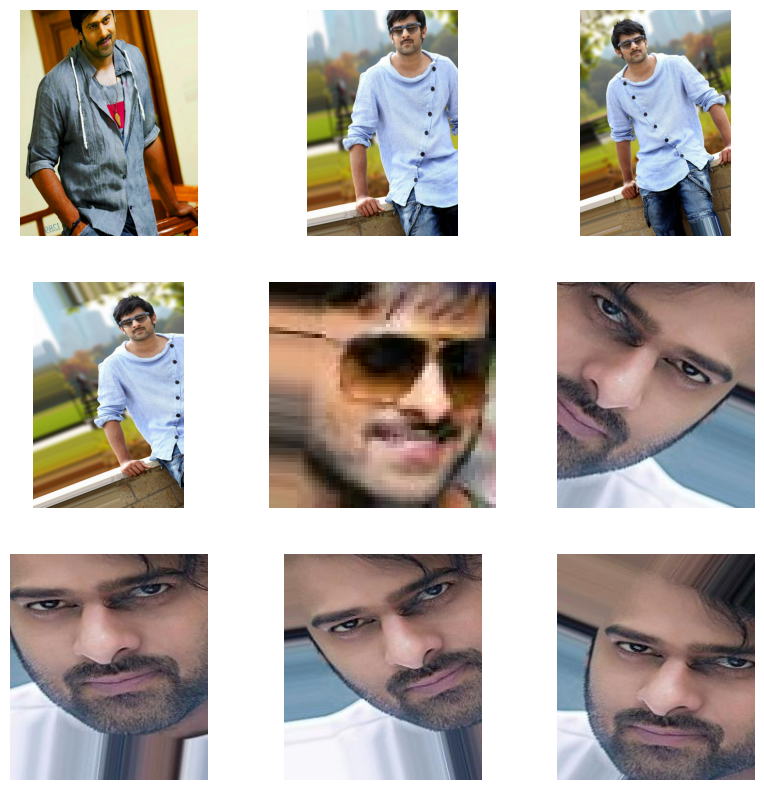

In [ ]:
import matplotlib.pyplot as plt
import random

# Visualize some augmented images
sample_class = random.choice(class_names)  # Choose a random class
sample_dir = os.path.join(augmented_dataset_dir, sample_class)
sample_images = os.listdir(sample_dir)

plt.figure(figsize=(10, 10))
for i, img_file in enumerate(sample_images[:9]):  # Show up to 9 images
    img_path = os.path.join(sample_dir, img_file)
    img = load_img(img_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()
